In [1]:
import numpy as np
import pandas as pd
import xarray as xr
import os
from dask.diagnostics import ProgressBar
from wmt_inert_tracer.preprocessing import preprocessing

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import sys
sys.path.append('/home/Jan-erik.Tesdal/wmt-inert-tracer/scripts/tools')
from plot import hovmoeller

In [3]:
outdir='/work/jet/data/interim/'

# Odiv-233, 232, 231, 230
rootdir = '/archive/Raphael.Dussin/FMS2019.01.03_devgfdl_20221223/'
# Odiv-226, Odiv-210, Odiv-209, Odiv-207, Odiv-206, Odiv-200, Odiv-191, Odiv-184
#rootdir = '/archive/Raphael.Dussin/FMS2019.01.03_devgfdl_20210706/' 
#rootdir = '/archive/Raphael.Dussin/FMS2019.01.03_devgfdl_20210308/' # Odiv-183, Odiv-170


#subdir = 'CM4_historical_c192_OM4p125' # odiv-233
#subdir = 'CM4_ssp585_c192_OM4p25' # odiv-232
subdir = 'CM4_historical_c192_OM4p25' # Odiv-231
#subdir = 'CM4_piControl_c192_OM4p25_v8' # odiv-230
#subdir = 'CM4_piControl_c192_OM4p25_v7_npolefix' # Odiv-226
#subdir = 'CM4_piControl_c192_OM4p25_v7' # Odiv-210
#subdir = 'CM4_piControl_c192_OM4p125_v7' # Odiv-209
#subdir = 'CM4_piControl_c192_OM4p125_v6_alt3' # Odiv-207
#subdir = 'CM4_piControl_c192_OM4p125_v6_alt2' # Odiv-206
#subdir = 'CM4_piControl_c192_OM4p125_v6_alt1' # Odiv-200
#subdir = 'CM4_piControl_c192_OM4p125_v6' # Odiv-191
#subdir = 'CM4_piControl_c192_OM4p125_v5' # Odiv-184
#subdir = 'CM4_piControl_c192_OM4p125_v5_proto1' # Odiv-183
#subdir = 'CM4_piControl_c192_OM4p25' # Odiv-170

platform = 'gfdl.ncrc4-intel18-prod-openmp'

In [4]:
pp = 'ocean_annual_rho2'# Odiv-226, Odiv-210, Odiv-209, Odiv-206, Odiv-200, Odiv-191, Odiv-184, Odiv-170
#pp = 'ocean_annual_rho2_d2'# Odiv-183
#pp = 'ocean_annual_rho2l35' # Odiv-209

full_path = os.path.join(rootdir,subdir,platform,'pp',pp)+'/ts/annual/10yr/'

In [5]:
var = '*'
tprd = '*'

print('dmls -lah',full_path+pp+'.%s.%s.nc'%(tprd,var))
print('dmget',full_path+pp+'.%s.%s.nc'%(tprd,var),'&')

dmls -lah /archive/Raphael.Dussin/FMS2019.01.03_devgfdl_20221223/CM4_historical_c192_OM4p25/gfdl.ncrc4-intel18-prod-openmp/pp/ocean_annual_rho2/ts/annual/10yr/ocean_annual_rho2.*.*.nc
dmget /archive/Raphael.Dussin/FMS2019.01.03_devgfdl_20221223/CM4_historical_c192_OM4p25/gfdl.ncrc4-intel18-prod-openmp/pp/ocean_annual_rho2/ts/annual/10yr/ocean_annual_rho2.*.*.nc &


In [6]:
vars_ds = xr.open_mfdataset(full_path+pp+'.%s.%s.nc'%(tprd,var),use_cftime=True, 
                            drop_variables=['average_DT','average_T1','average_T2','time_bnds'])

In [7]:
print(vars_ds.dims)

Frozen({'nv': 2, 'rho2_i': 75, 'rho2_l': 74, 'time': 160, 'yh': 1080, 'xh': 1440, 'xq': 1441, 'yq': 1081})


In [8]:
nrho='hires' # lores, hires

In [9]:
grid = xr.open_dataset(os.path.join(rootdir,subdir,platform,'pp',pp)+'/'+pp+'.static.nc')

In [10]:
pd.concat([vars_ds.xh.to_series().reset_index(drop=True), vars_ds.xq.to_series().reset_index(drop=True),
           grid.xh.to_series().reset_index(drop=True), grid.xq.to_series().reset_index(drop=True)], axis=1)

,xh,xq,xh,xq
0,-299.724244,-299.842324,-299.724244,-299.842324
1,-299.476198,-299.594355,-299.476198,-299.594355
2,-299.228150,-299.346385,-299.228150,-299.346385
3,-298.980100,-299.098412,-298.980100,-299.098412
4,-298.732048,-298.850438,-298.732048,-298.850438
...,...,...,...,...
1436,59.283593,59.165825,59.283593,59.165825
1437,59.531631,59.413784,59.531631,59.413784
1438,59.779670,59.661746,59.779670,59.661746
1439,60.027712,59.909710,60.027712,59.909710


In [11]:
pd.concat([vars_ds.yh.to_series().reset_index(drop=True), vars_ds.yq.to_series().reset_index(drop=True),
           grid.yh.to_series().reset_index(drop=True), grid.yq.to_series().reset_index(drop=True)], axis=1)

,yh,yq,yh,yq
0,-80.389238,-80.429819,-80.389238,-80.429819
1,-80.308075,-80.348657,-80.308075,-80.348657
2,-80.226911,-80.267493,-80.226911,-80.267493
3,-80.145748,-80.186329,-80.145748,-80.186329
4,-80.064587,-80.105167,-80.064587,-80.105167
...,...,...,...,...
1076,89.621693,89.567649,89.621693,89.567649
1077,89.729781,89.675737,89.729781,89.675737
1078,89.837868,89.783825,89.837868,89.783825
1079,89.945956,89.891912,89.945956,89.891912


In [12]:
#grid = grid.assign_coords({'xh':vars_ds.xh,'yh':vars_ds.yh,'xq':vars_ds.xq,'yq':vars_ds.yq}) # p125_d2
grid = grid.isel(xq=slice(1,None),yq=slice(1,None)) # p25

vars_ds = vars_ds.isel(xq=slice(1,None),yq=slice(1,None)) # All
#grid = grid.isel(xq=slice(None,-1),yq=slice(None,-1)) # p125

In [13]:
ds = preprocessing(vars_ds, grid, decode_times=False, verbose=False)

In [14]:
print(str(ds.time.values[0])[:10],'to',str(ds.time.values[-1])[:10])

1850-07-02 to 2009-07-02


In [15]:
rho0 = 1035.0
#contours = [-30,-26,-22,-18,-14,-10,-6,-2,2,6,10,14,18,22,26,30]
#contours = np.concatenate([np.arange(-25,0,5),np.array([-2,2]),np.arange(5,30,5)])
contours = np.concatenate([np.arange(-25,0,5),np.arange(5,30,5)])

### Dask Cluster

### Overturning in `rho2`

In [16]:
vmo = ds.vmo.where(ds.vmo<1e14)

In [17]:
# Sum over the zonal direction and integrate along density
integ_layers = (vmo.sum('x').cumsum('rho2_l') - vmo.sum('x').sum('rho2_l'))/rho0/1.0e6 + 0.1

# The result of the integration over layers is evaluated at the interfaces
# with psi = 0 as the bottom boundary condition for the integration
bottom_condition = xr.zeros_like(integ_layers.isel({'rho2_l': 0}))

# combine bottom condition with data array
#psi_raw = xr.concat([integ_layers, bottom_condition], dim='rho2_l')
psi_raw = xr.concat([bottom_condition, integ_layers], dim='rho2_l')

# need to rechunk to new size
psi_raw = psi_raw.chunk({'rho2_l': len(psi_raw['rho2_l'])})

# rename to correct dimension and add correct vertical coordinate
psi = psi_raw.rename({'rho2_l': 'rho2_i'}).transpose('time','rho2_i','yq')
psi['rho2_i'] = vars_ds.rho2_i
psi.name = 'psi'

In [20]:
with ProgressBar():
    moc_rho2 = psi.load()

[########################################] | 100% Completed | 12min 29.1s


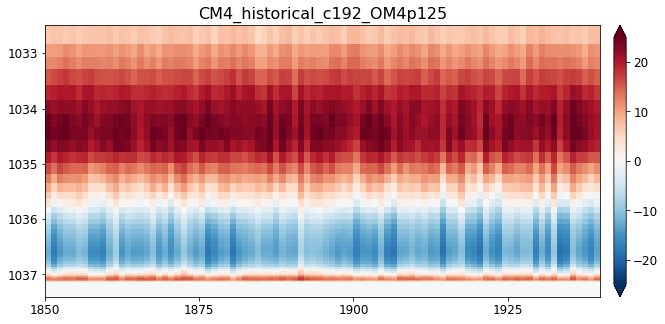

In [21]:
fig = hovmoeller((-moc_rho2).sel(yq=[-30], method='nearest').squeeze().sel(rho2_i=slice(1032.5,1037.4)), 
                 fsize=[12, 5], yincrease=False, vrange=[-25,25],title=subdir)

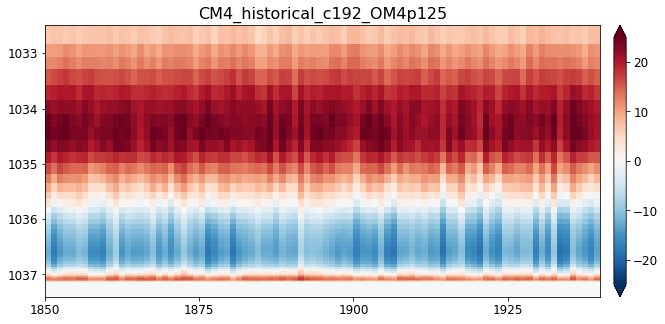

In [23]:
fig = hovmoeller((-moc_rho2).sel(yq=[-30], method='nearest').squeeze().sel(rho2_i=slice(1032.5,1037.4)), 
                 fsize=[12, 5], yincrease=False, vrange=[-25,25],title=subdir)

In [24]:
# Check for missing time points
moc_rho2.isel(time=slice(0,-1))[moc_rho2.time.dt.year.diff(dim='time',label='lower') > 1].time

<xarray.DataArray 'time' (time: 0)>
array([], dtype=object)
Coordinates:
  * time     (time) object 
Attributes:
    long_name:      time
    axis:           T
    calendar_type:  NOLEAP
    bounds:         time_bnds

In [25]:
var = 'moc'
fname = subdir+'_global_%sto%s_%s_rho2_online_%s.nc'\
        %(str(moc_rho2.time.dt.year[0].values).rjust(4, '0'),str(moc_rho2.time.dt.year[-1].values).rjust(4, '0'), var, nrho)
print('Saving to file:', fname)
moc_rho2.reset_coords(drop=True).to_dataset(name='psi').to_netcdf(outdir+fname, format='NETCDF4')

Saving to file: CM4_historical_c192_OM4p125_global_1850to1939_moc_rho2_online_hires.nc


In [26]:
#yr_st,yr_ed = '2071','2090'
#yr_st,yr_ed = '1990','2009'
#yr_st,yr_ed = '0201','0350'
moc_rho2 = moc_rho2.sel(time=slice(yr_st,yr_ed))

In [27]:
from om4labs.m6plot.formatting import VerticalSplitScale

/nbhome/jet/miniconda3/envs/python39/lib/python3.9/site-packages/geopandas/_compat.py:111: UserWarning: The Shapely GEOS version (3.10.0-CAPI-1.16.0) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  warnings.warn(


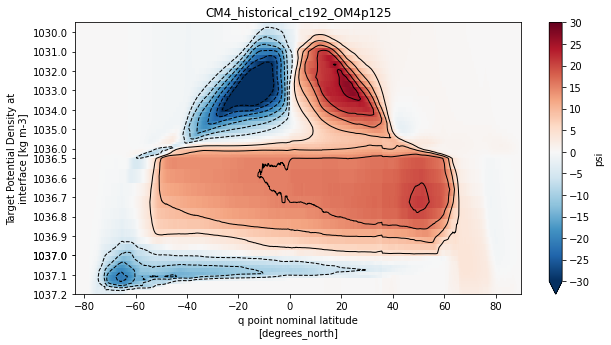

In [28]:
fig, ax = plt.subplots(figsize=(10,5))
moc_rho2.mean('time').sel(rho2_i=slice(1027.5,None))\
        .plot(ax=ax, yincrease=False,vmin=-30,vmax=30,cmap='RdBu_r',
              cbar_kwargs={'ticks': np.arange(-30,35,5)})
moc_rho2.mean('time').sel(rho2_i=slice(1027.5,None))\
        .plot.contour(ax=ax, yincrease=False, levels=np.concatenate([np.arange(-30,0,5),np.arange(5,35,5)]), 
                      colors='k', linewidths=1)
ax.set_yscale('splitscale', zval=[1037.2, 1036.5, 1029.5])
ax.invert_yaxis()
ax.set_title(subdir)
plt.show()

### Subselect Southern Ocean

In [18]:
tstr = '%sto%s'%(str(ds.time.dt.year[0].values).rjust(4, '0'),str(ds.time.dt.year[-1].values).rjust(4, '0'))
#tstr = '0001to0310'
moc_rho2 = xr.open_dataset(outdir+subdir+'_global_'+tstr+'_moc_rho2_online_'+nrho+'.nc').psi

In [19]:
smoc_rho2 = moc_rho2.sel(rho2_i=slice(1033,1038),yq=slice(None,0))

In [21]:
yr_st,yr_ed = '1920','1939'
smoc_rho2_mean = smoc_rho2.sel(time=slice(yr_st,yr_ed)).mean('time')
smoc_rho2_mean['sigma2'] = smoc_rho2_mean.rho2_i-1000
smoc_rho2_mean = smoc_rho2_mean.swap_dims({'rho2_i':'sigma2'})

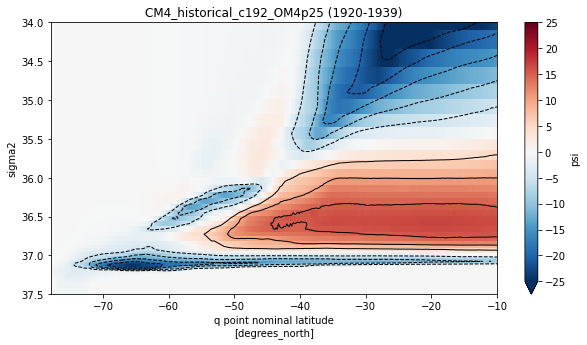

In [22]:
fig, ax = plt.subplots(figsize=(10,5))
smoc_rho2_mean.plot(ax=ax, yincrease=False,vmin=-25,vmax=25,cmap='RdBu_r',
                    cbar_kwargs={'ticks': np.arange(-25,30,5)})
smoc_rho2_mean.plot.contour(ax=ax, yincrease=False, levels=contours, 
                            colors='k', linewidths=1)
ax.set_xlim((-78,-10))
ax.set_ylim((37.5,34))
ax.set_title(subdir+' (%s-%s)'%(yr_st,yr_ed))
plt.show()

In [23]:
lat_spn = -60

# Find the location of the minimum (lower limb overturning)
smoc_lower_mean = smoc_rho2_mean.sel(sigma2=slice(36.7,None),yq=slice(None,lat_spn))
y_min_idx = smoc_lower_mean.argmin(dim=['sigma2', 'yq'])['yq']
rho2_min_idx = smoc_lower_mean.argmin(dim=['sigma2', 'yq'])['sigma2']

In [24]:
print('Minimum:',
      np.round(smoc_lower_mean.isel(sigma2=rho2_min_idx,yq=y_min_idx).values,1),'Sv at',
      np.round(smoc_lower_mean.yq[y_min_idx].values,1),'N and',
      np.round(smoc_lower_mean.sigma2[rho2_min_idx].values,1),'kg/m^3 density')

Minimum: -24.8 Sv at -65.8 N and 37.1 kg/m^3 density


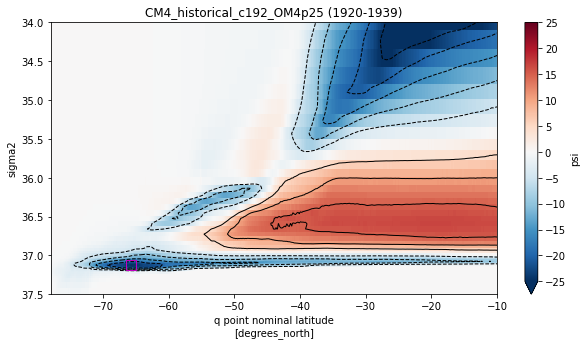

In [25]:
fig, ax = plt.subplots(figsize=(10,5))
smoc_rho2_mean.plot(ax=ax, yincrease=False,vmin=-25,vmax=25,cmap='RdBu_r',
                    cbar_kwargs={'ticks': np.arange(-25,30,5)})
smoc_rho2_mean.plot.contour(ax=ax, yincrease=False, levels=contours, 
                            colors='k', linewidths=1)
ax.plot(smoc_lower_mean.yq[y_min_idx],smoc_lower_mean.sigma2[rho2_min_idx],
        marker='s',c='m',ms=10,mew=1,mfc='none')
ax.set_xlim((-78,-10))
ax.set_ylim((37.5,34))
ax.set_title(subdir+' (%s-%s)'%(yr_st,yr_ed))
plt.show()

In [26]:
# Subpolar cell strength
smoc_rho2_lower = smoc_rho2.sel(rho2_i=slice(1036.7,None),yq=slice(None,lat_spn))

In [27]:
smoc_rho2_lower_dec = smoc_rho2_lower.resample({'time':'10A'},loffset='4A').mean()

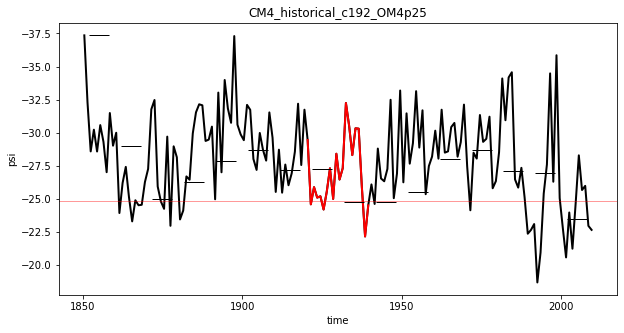

In [28]:
ms = 20

fig, ax = plt.subplots(figsize=(10,5))
smoc_rho2_lower.min(dim=['rho2_i', 'yq']).plot(ax=ax,lw=2,c='k')#,marker='o',ms=4)
smoc_rho2_lower.min(dim=['rho2_i', 'yq']).sel(time=slice(yr_st,yr_ed)).plot(ax=ax,lw=2,c='r')

smoc_rho2_lower_dec.min(dim=['rho2_i', 'yq']).isel(time=slice(None,-1))\
    .plot(ax=ax,ls='None',c='k',marker='_',ms=ms)
ax.axhline(y=np.round(smoc_lower_mean.isel(sigma2=rho2_min_idx,yq=y_min_idx).values,1), xmin=0, xmax=1, 
               linewidth=1.0, color = 'r',alpha=0.4)
ax.invert_yaxis()
ax.set_title(subdir)
plt.show()

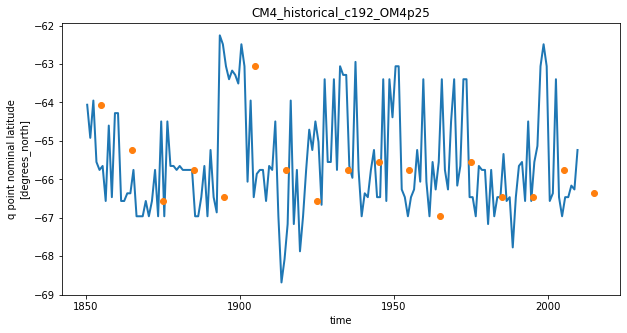

In [29]:
fig, ax = plt.subplots(figsize=(10,5))
smoc_rho2_lower.yq[smoc_rho2_lower.argmin(dim=['rho2_i', 'yq'])['yq']].plot(ax=ax,lw=2)
smoc_rho2_lower_dec.yq[smoc_rho2_lower_dec.argmin(dim=['rho2_i', 'yq'])['yq']].plot(ax=ax,ls='None',marker='o')
ax.set_title(subdir)
plt.show()

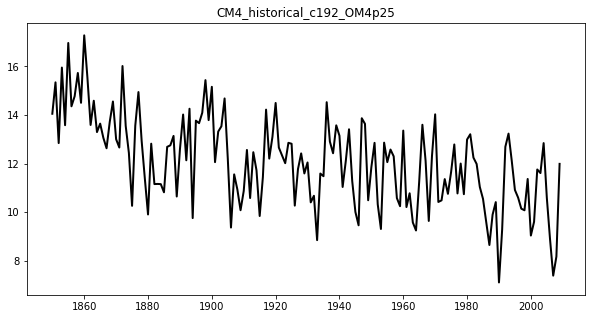

In [30]:
ymax = (-moc_rho2).sel(yq=[-30], method='nearest').squeeze()\
        .sel(rho2_i=slice(1036.85,None)).max(dim='rho2_i').groupby('time.year').mean('time')

fig, ax = plt.subplots(figsize=(10,5))
ymax.plot(ax=ax,lw=2,c='k',_labels=False,ls='-')
ax.set_title(subdir)
#ax.set_xlim([-20,360])
#ax.set_ylim([9,24.3])
plt.show()

## AMOC

### Generate basin mask

In [17]:
from cmip_basins import generate_basin_codes

/nbhome/jet/miniconda3/envs/python39/lib/python3.9/site-packages/geopandas/_compat.py:111: UserWarning: The Shapely GEOS version (3.10.0-CAPI-1.16.0) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  warnings.warn(


In [13]:
basincodes = generate_basin_codes(grid, lon='geolon_v', lat='geolat_v', mask='wet_v')

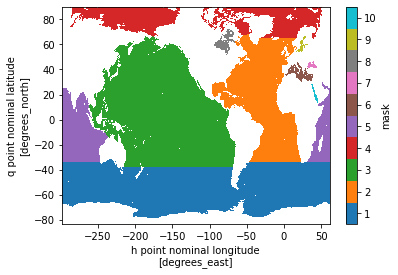

In [14]:
basincodes.where(grid['wet_v']==1).plot(cmap='tab10',vmin=0.5,vmax=10.5,cbar_kwargs={'ticks': np.arange(1,12,1)})

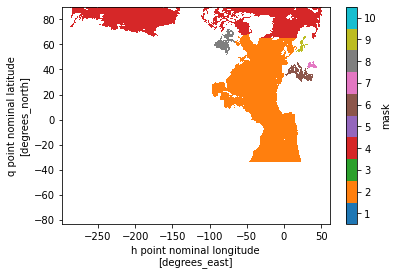

In [15]:
idx = [2, 4, 6, 7, 8, 9]
bmask = xr.DataArray(np.in1d(basincodes,idx).reshape(basincodes.shape),dims=basincodes.dims, 
                     coords=basincodes.coords)

basincodes.where(bmask==1).where(grid['wet_v']==1).plot(cmap='tab10',vmin=0.5,vmax=10.5,cbar_kwargs={'ticks': np.arange(1,12,1)})

In [16]:
bmask.reset_coords(drop=True).to_dataset(name='mask').to_netcdf(outdir+subdir+'_bmaskv_AtlArc.nc', format='NETCDF4')

### Calculate AMOC streamfunction

In [18]:
use_d2 = False

In [19]:
if subdir.split('_')[3][3:]=='p125':
    mhead = subdir.split('_')[3][3:]+'_d2' if use_d2 else subdir.split('_')[3][3:]
else:
    mhead = subdir.split('_')[3][3:]
print('Loading',mhead+'_bmaskv_AtlArc.nc')
bmask = xr.open_dataset(outdir[:-13]+'static/'+mhead+'_bmaskv_AtlArc.nc').mask

Loading p25_bmaskv_AtlArc.nc


In [22]:
vmo = ds.vmo.where(bmask.rename({'xh':'x'})==1).where(grid['wet_v'].rename({'xh':'x'})==1).where(ds.vmo<1e14)

# Sum over the zonal direction and integrate along density
integ_layers = (vmo.sum('x').cumsum('rho2_l') - vmo.sum('x').sum('rho2_l'))/rho0/1.0e6# + 0.1
    
# The result of the integration over layers is evaluated at the interfaces
# with psi = 0 as the bottom boundary condition for the integration
bottom_condition = xr.zeros_like(integ_layers.isel({'rho2_l': 0}))
    
# combine bottom condition with data array
psi_raw = xr.concat([bottom_condition, integ_layers], dim='rho2_l')
    
# need to rechunk to new size
psi_raw = psi_raw.chunk({'rho2_l': len(psi_raw['rho2_l'])})
    
# rename to correct dimension and add correct vertical coordinate
psi = psi_raw.rename({'rho2_l': 'rho2_i'}).transpose('time','rho2_i','yq')
psi['rho2_i'] = vars_ds.rho2_i.values
psi.name = 'psi'

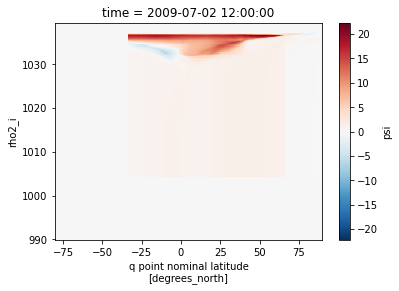

In [23]:
psi[-1].plot()

In [24]:
with ProgressBar():
    amoc_rho2 = psi.load()

[########################################] | 100% Completed |  5min 50.6s


In [25]:
amoc_mean = amoc_rho2.mean('time').sel(rho2_i=slice(1028.5,None))
y_max_idx = amoc_mean.argmax(dim=['rho2_i', 'yq'])['yq']
rho2_max_idx = amoc_mean.argmax(dim=['rho2_i', 'yq'])['rho2_i']

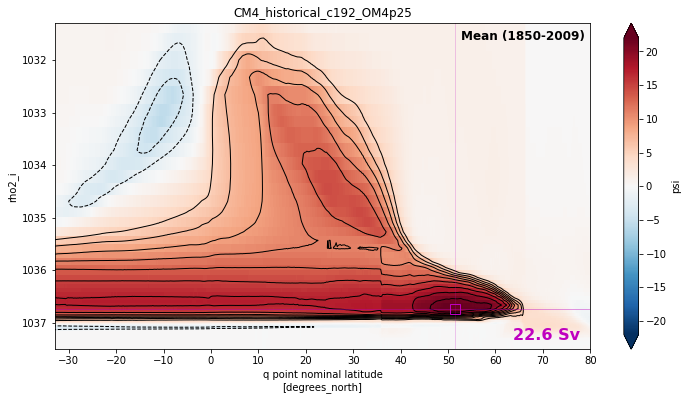

In [26]:
fig, ax = plt.subplots(figsize=(12,6))
amoc_mean.plot(ax=ax, yincrease=False, vmin=-22, vmax=22, cmap='RdBu_r', extend='both',cbar_kwargs={'ticks': np.arange(-20,25,5)})
amoc_mean.plot.contour(ax=ax, yincrease=False, levels=np.concatenate([np.arange(-20,0,2),np.arange(5,22,2)]), 
                       colors='k', linewidths=1)
ax.plot(amoc_mean.yq[y_max_idx],amoc_mean.rho2_i[rho2_max_idx],marker='s',c='m',ms=10,mew=1,mfc='none')
ax.axvline(x=amoc_mean.yq[y_max_idx], ymin=0, ymax=1, linewidth=1.0, color = 'm',alpha=0.2)
ax.axhline(y=amoc_mean.rho2_i[rho2_max_idx], xmin=0, xmax=1, linewidth=1.0, color = 'm',alpha=0.4)
ax.text(0.98, 0.02, '%1.1f Sv'%np.round(amoc_mean.isel(rho2_i=rho2_max_idx,yq=y_max_idx).values,1),
        horizontalalignment='right', verticalalignment='bottom', transform=ax.transAxes, 
        fontsize=16, fontweight='bold',color='m')
ax.set_xlim((-33,80))
ax.set_xticks(np.arange(-30,90,10))
ax.set_ylim((1037.5,1031.3))
ax.set_title(subdir)
ax.text(0.99, 0.98, 'Mean (%s-%s)'%(str(amoc_rho2.time.dt.year[0].values).rjust(4, '0'),
                                    str(amoc_rho2.time.dt.year[-1].values).rjust(4, '0')), 
        ha='right', va='top', fontsize=12, fontweight='bold',transform=ax.transAxes)
plt.show()

In [27]:
var = 'amoc'
fname = subdir+'_AtlArc_%sto%s_%s_rho2_online_%s.nc'\
        %(str(amoc_rho2.time.dt.year[0].values).rjust(4, '0'),str(amoc_rho2.time.dt.year[-1].values).rjust(4, '0'), var, nrho)
print('Saving to file:', fname)
amoc_rho2.reset_coords(drop=True).to_dataset(name='psi').to_netcdf(outdir+fname, format='NETCDF4')

Saving to file: CM4_historical_c192_OM4p25_AtlArc_1850to2009_amoc_rho2_online_hires.nc


In [28]:
amoc_rho2 = xr.open_dataset(outdir+fname).psi

In [29]:
amoc_psi_ann = amoc_rho2.sel(rho2_i=slice(1028.5,None))
amoc_psi_dec = amoc_rho2.sel(rho2_i=slice(1028.5,None)).resample({'time':'10A'},loffset='4A').mean()

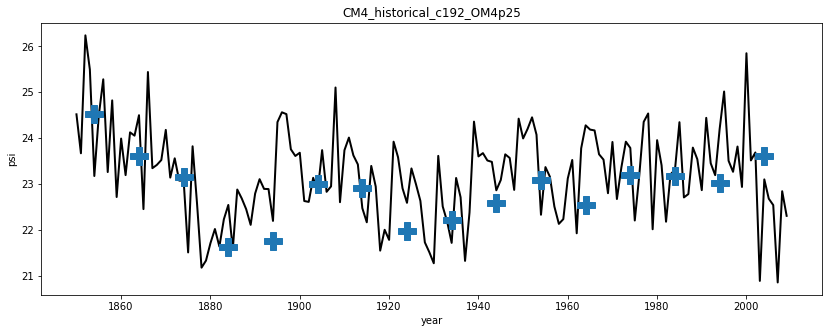

In [30]:
ms = 18

fig, ax = plt.subplots(figsize=(14,5))
amoc_psi_ann.max(dim=['rho2_i', 'yq']).groupby('time.year').mean('time').plot(ax=ax,lw=2,c='k')
amoc_psi_dec.max(dim=['rho2_i', 'yq']).isel(time=slice(None,-1)).groupby('time.year').mean('time')\
    .plot(ax=ax,ls='None',marker='P',ms=ms)
ax.set_title(subdir)
#ax.set_xlim([-20,360])
plt.show()

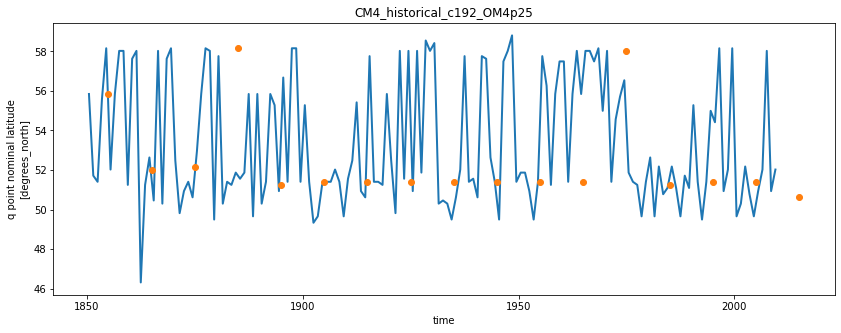

In [31]:
fig, ax = plt.subplots(figsize=(14,5))
amoc_psi_ann.yq[amoc_psi_ann.argmax(dim=['rho2_i', 'yq'])['yq']].plot(ax=ax,lw=2)
amoc_psi_dec.yq[amoc_psi_dec.argmax(dim=['rho2_i', 'yq'])['yq']].plot(ax=ax,ls='None',marker='o')
ax.set_title(subdir)
plt.show()

## `ocean_annual_z`

In [32]:
from wmt_inert_tracer.wmt import wmt
from wmt_inert_tracer.compute import lbin_define
import momlevel as ml # Use Wright EOS
import fastjmd95 as jmd95

In [33]:
import sys
sys.path.append('/home/Jan-erik.Tesdal/wmt-inert-tracer/scripts/tools')
from compute import get_xgcm_grid

In [34]:
pp = 'ocean_annual_z'# Odiv-206, Odiv-200, Odiv-191, Odiv-184, Odiv-170
#pp = 'ocean_annual_z_d2'# Odiv-183
full_path = os.path.join(rootdir,subdir,platform,'pp',pp)+'/ts/annual/10yr/'

In [35]:
print('dmls -lah',full_path+'/'+pp+'.%s.*.nc'%tprd)
print('dmget',full_path+'/'+pp+'.%s.*.nc'%tprd,'&')

dmls -lah /archive/Raphael.Dussin/FMS2019.01.03_devgfdl_20221223/CM4_historical_c192_OM4p25/gfdl.ncrc4-intel18-prod-openmp/pp/ocean_annual_z/ts/annual/10yr//ocean_annual_z.*.*.nc
dmget /archive/Raphael.Dussin/FMS2019.01.03_devgfdl_20221223/CM4_historical_c192_OM4p25/gfdl.ncrc4-intel18-prod-openmp/pp/ocean_annual_z/ts/annual/10yr//ocean_annual_z.*.*.nc &


In [36]:
ds_z = xr.open_mfdataset(full_path+'/'+pp+'.%s.*.nc'%tprd,use_cftime=True,
                         drop_variables=['average_DT','average_T1','average_T2'])

In [37]:
pd.concat([ds_z.xh.to_series().reset_index(drop=True), ds_z.xq.to_series().reset_index(drop=True),
           grid.xh.to_series().reset_index(drop=True), grid.xq.to_series().reset_index(drop=True)], axis=1)

,xh,xq,xh,xq
0,-299.724244,-299.842324,-299.724244,-299.594355
1,-299.476198,-299.594355,-299.476198,-299.346385
2,-299.228150,-299.346385,-299.228150,-299.098412
3,-298.980100,-299.098412,-298.980100,-298.850438
4,-298.732048,-298.850438,-298.732048,-298.602461
...,...,...,...,...
1436,59.283593,59.165825,59.283593,59.413784
1437,59.531631,59.413784,59.531631,59.661746
1438,59.779670,59.661746,59.779670,59.909710
1439,60.027712,59.909710,60.027712,60.157676


In [38]:
pd.concat([ds_z.yh.to_series().reset_index(drop=True), ds_z.yq.to_series().reset_index(drop=True),
           grid.yh.to_series().reset_index(drop=True), grid.yq.to_series().reset_index(drop=True)], axis=1)

,yh,yq,yh,yq
0,-80.389238,-80.429819,-80.389238,-80.348657
1,-80.308075,-80.348657,-80.308075,-80.267493
2,-80.226911,-80.267493,-80.226911,-80.186329
3,-80.145748,-80.186329,-80.145748,-80.105167
4,-80.064587,-80.105167,-80.064587,-80.024008
...,...,...,...,...
1076,89.621693,89.567649,89.621693,89.675737
1077,89.729781,89.675737,89.729781,89.783825
1078,89.837868,89.783825,89.837868,89.891912
1079,89.945956,89.891912,89.945956,90.000000


In [39]:
ds_z = ds_z.isel(xq=slice(1,None),yq=slice(1,None))

In [40]:
ds_z['rhopot2'] = ml.derived.calc_pdens(ds_z.thetao, ds_z.so, level=2000.0)

In [41]:
ds_z = preprocessing(ds_z, grid, decode_times=False, verbose=False)

In [42]:
xgrid = get_xgcm_grid(ds_z,grid.rename({'xh':'x','yh':'y'}),periodic=['X'])

In [43]:
xgrid

<xgcm.Grid>
X Axis (periodic, boundary=None):
  * center   x --> right
  * right    xq --> center
Y Axis (not periodic, boundary=None):
  * center   y --> right
  * right    yq --> center
Z Axis (not periodic, boundary=None):
  * center   lev --> outer
  * outer    lev_outer --> center

In [44]:
# Thickness mapped to rho2 
thk = (ds.volcello/ds.areacello)
# Cumulative sum of thickness to get the time averaged depth of an isopycnal 
integ_layers = thk.mean('x').cumsum('rho2_l')
bottom_condition = xr.zeros_like(integ_layers.isel({'rho2_l': 0}))
zrho_raw = xr.concat([bottom_condition, integ_layers], dim='rho2_l')
zrho_raw = zrho_raw.chunk({'rho2_l': len(zrho_raw['rho2_l'])})
zrho = zrho_raw.rename({'rho2_l': 'rho2_i'}).transpose('time','rho2_i','y')
zrho['rho2_i'] = vars_ds.rho2_i.values
zrho.name = 'Depth'

In [45]:
with ProgressBar():
    zrho_q = xgrid.interp(zrho, 'Y', boundary='extend').load()

[########################################] | 100% Completed |  5min 24.1s


In [46]:
var = 'depth'
fname = subdir+'_global_%sto%s_%s_rho2_online_%s.nc'\
        %(str(zrho.time.dt.year[0].values).rjust(4, '0'),str(zrho.time.dt.year[-1].values).rjust(4, '0'), var, nrho)
print('Saving to file:', fname)
zrho_q.reset_coords(drop=True).to_dataset(name='Depth').to_netcdf(outdir+fname, format='NETCDF4')

Saving to file: CM4_historical_c192_OM4p25_global_1850to2009_depth_rho2_online_hires.nc


### Calculate `sigma2` in z space

In [47]:
#yr_st,yr_ed = '2015','2045'
yr_st,yr_ed = '1920','1939'

In [48]:
#sig = xgrid.interp(ds_z.rhopot2 - 1000, 'Y', boundary='extend').rename('sigma2')
sig = xgrid.interp(jmd95.rho(ds_z.so, ds_z.thetao, 2000) - 1000, 'Y', boundary='extend').rename('sigma2')
#sig = xgrid.interp(ds_z.rhopot2 - 1000, 'Y', boundary='extend').rename('sigma2')

#### Zonal and temporal mean

In [49]:
with ProgressBar():
    sig2_mean = sig.sel(time=slice(yr_st,yr_ed)).mean('time').mean('x').load()

[########################################] | 100% Completed |  1min  4.2s


In [50]:
eos = 'jmd95' # jmd95, gsw, wright
fname = subdir+'_global_%sto%s_sigma2_%s_zmean.nc'%(yr_st,yr_ed,eos)
print('Saving to file:', fname)
sig2_mean.reset_coords(drop=True).to_dataset(name='sigma2').to_netcdf(outdir+fname, format='NETCDF4')

Saving to file: CM4_historical_c192_OM4p25_global_1920to1939_sigma2_jmd95_zmean.nc


#### Zonal mean

In [51]:
#sig = sig.sel(time=slice('0181',None))

In [52]:
with ProgressBar():
    sig_zm = sig.mean('x').load()

[########################################] | 100% Completed |  5min 29.1s


In [53]:
eos = 'jmd95' # wright, jmd95
fname = subdir+'_global_%sto%s_sigma2_%s_zmean_annual.nc'%(str(sig_zm.time.dt.year[0].values).rjust(4, '0'),
                                                           str(sig_zm.time.dt.year[-1].values).rjust(4, '0'),eos)
print('Saving to file:', fname)
sig_zm.reset_coords(drop=True).to_dataset(name='sigma2').to_netcdf(outdir+fname, format='NETCDF4')

Saving to file: CM4_historical_c192_OM4p25_global_1850to2009_sigma2_jmd95_zmean_annual.nc


### Reproject `rho2` overturning to z coordinates

In [54]:
yr_st,yr_ed

('1920', '1939')

In [55]:
#yr_st,yr_ed = '0181','0200'
volcello = ds.volcello.sel(time=slice(yr_st,yr_ed))

In [56]:
# Thickness mapped to rho2 
thk = (volcello/ds.areacello).mean('time')
#thk = ds.volcello/ds.areacello
#thk = ds.thkcello.mean('time')

# Cumulative sum of thickness to get the time averaged depth of an isopycnal 
#zrho = thk.mean('x').cumsum('rho2_l')
integ_layers = thk.mean('x').cumsum('rho2_l')
bottom_condition = xr.zeros_like(integ_layers.isel({'rho2_l': 0}))
zrho_raw = xr.concat([bottom_condition, integ_layers], dim='rho2_l') # preferred
zrho_raw = zrho_raw.chunk({'rho2_l': len(zrho_raw['rho2_l'])})
zrho = zrho_raw.rename({'rho2_l': 'rho2_i'}).transpose('rho2_i','y')
#zrho = zrho_raw.rename({'rho2_l': 'rho2_i'}).transpose('time','rho2_i','y')
#zrho = zrho_raw.reset_coords(drop=True).rename({'rho2_l': 'rho2_i'}).transpose('rho2_i','y')

zrho['rho2_i'] = vars_ds.rho2_i
zrho.name = 'Depth'

In [57]:
# Load global streamfunction
tstr = '%sto%s'%(str(ds.time.dt.year[0].values).rjust(4, '0'),str(ds.time.dt.year[-1].values).rjust(4, '0'))
#tstr = '0001to0200'
moc_rho2 = xr.open_dataset(outdir+subdir+'_global_'+tstr+'_moc_rho2_online_'+nrho+'.nc').psi
#z_rho2 = xr.open_dataset(outdir+subdir+'_global_'+tstr+'_zrho_online_'+nrho+'.nc').zrho

In [62]:
#yr_st,yr_ed = '0181','0200'
psi = moc_rho2.sel(time=slice(yr_st,yr_ed))#.isel(yq=slice(1,None))
#zrho = z_rho2.sel(time=slice(yr_st,yr_ed)).mean('time')

In [63]:
psi.coords['depth'] = xgrid.interp(zrho, 'Y', boundary='extend')

In [64]:
with ProgressBar():
    psi_mean = psi.mean('time').load()

[########################################] | 100% Completed | 59.3s


In [65]:
fname = subdir+'_global_%sto%s_moc_rho2_online_mean_%s_reprojected.nc'\
        %(str(psi.time.dt.year[0].values).rjust(4, '0'),str(psi.time.dt.year[-1].values).rjust(4, '0'),nrho)
print('Saving to file:', fname)
psi_mean.to_dataset(name='psi').to_netcdf(outdir+fname, format='NETCDF4')

Saving to file: CM4_historical_c192_OM4p25_global_1920to1939_moc_rho2_online_mean_hires_reprojected.nc


In [66]:
#fname = 'CM4_piControl_c192_OM4p125_v5_global_0151to0200_moc_rho2_online_mean_hires_reprojected.nc'
psi_mean = xr.open_dataset(outdir+fname).psi

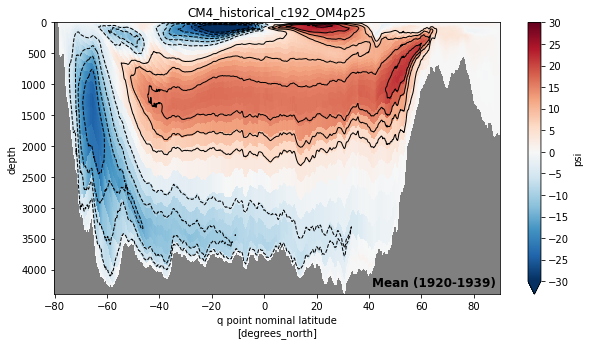

In [67]:
fig, ax = plt.subplots(figsize=(10,5))
psi_mean.plot(ax=ax,x='yq', y='depth',yincrease=False,vmin=-30,vmax=30,cmap='RdBu_r',
              cbar_kwargs={'ticks': np.arange(-30,35,5)})
psi_mean.plot.contour(ax=ax, x='yq', y='depth', yincrease=False, 
                      levels=np.concatenate([np.arange(-30,0,5),np.arange(5,35,5)]), 
                      colors='k', linewidths=1)
ax.set_facecolor('gray')
ax.set_title(subdir)
ax.text(0.99, 0.02, 'Mean (%s-%s)'%(yr_st,yr_ed), ha='right', va='bottom', fontsize=12, fontweight='bold',transform=ax.transAxes)
ax.set_ylim((4400,0))
plt.show()

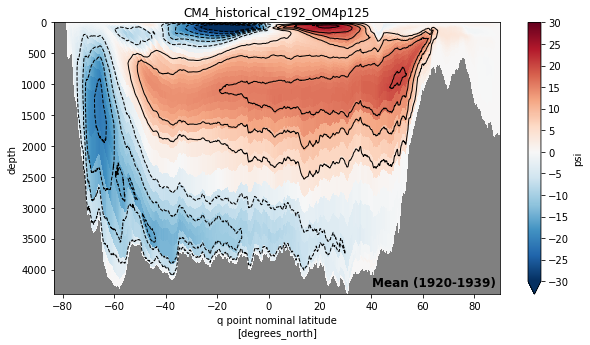

In [68]:
#tstr = '%sto%s'%(str(ds.time.dt.year[0].values).rjust(4, '0'),str(ds.time.dt.year[-1].values).rjust(4, '0'))
tstr = '1920to1939'
#CM4_ssp585_c192_OM4p25_global_2015to2045_sigma2_jmd95_zmean
sig2 = xr.open_dataset(outdir+subdir+'_global_'+tstr+'_sigma2_jmd95_zmean.nc').sigma2
#sig2_mean = sig2.sel(time=slice(yr_st,yr_ed)).mean('time')

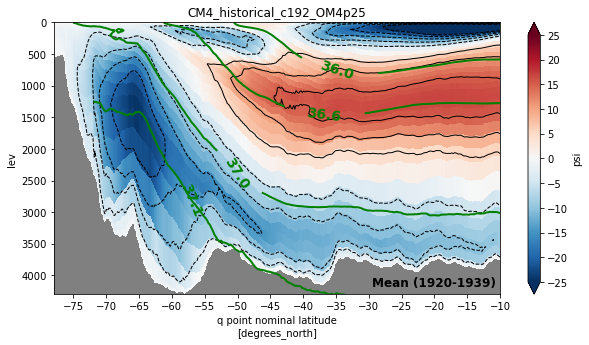

In [69]:
fig, ax = plt.subplots(figsize=(10,5))

psi_mean.plot(ax=ax,x='yq', y='depth', yincrease=False,vmin=-25,vmax=25,cmap='RdBu_r',
              cbar_kwargs={'ticks': np.arange(-25,30,5)})
psi_mean.plot.contour(ax=ax,x='yq', y='depth', yincrease=False, levels=contours, colors='k', linewidths=1)
cs = sig2_mean.plot.contour(ax=ax, x='yq', y='lev',yincrease=False,colors='g',linewidths=2,levels=[36.0,36.6,37.0])
clab = ax.clabel(cs, cs.levels, inline=True, fmt='%1.1f', fontsize=14,
                 manual=[(-35,800), (-37,1500), (-53,2500)],inline_spacing=1)
[txt.set_fontweight('bold') for txt in clab]
cs2 = sig2_mean.sel(yq=slice(-72,-30)).plot.contour(ax=ax, x='yq', y='lev',yincrease=False,colors='g',
                                                    linewidths=2,levels=[37.1])
clab2 = ax.clabel(cs2, cs2.levels, inline=False, fmt='%1.1f', fontsize=14, manual=[(-65,3000)])
[txt.set_fontweight('bold') for txt in clab2]
ax.set_xlim((-78,-10))
ax.set_facecolor('gray')
ax.set_xticks(np.arange(-75,-5,5))
ax.set_ylim((4300,0))
ax.set_title(subdir)
ax.text(0.99, 0.02, 'Mean (%s-%s)'%(yr_st,yr_ed), ha='right', va='bottom', fontsize=12, fontweight='bold',transform=ax.transAxes)
plt.show()

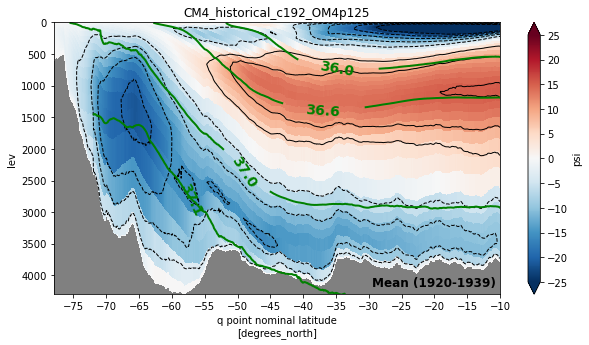

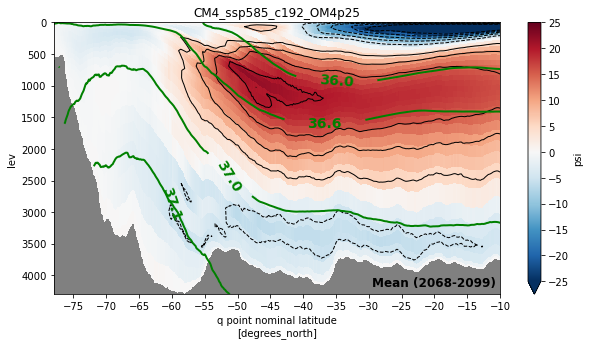